#Описание задания
Нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

#Этапы работы

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Подготовьте датасет к обучению моделей.

  a) Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.

  b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

  a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

  b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

  a) Повторите п. 5

8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).

  a) Повторите п. 5

9. Сформулируйте выводы по проделанной работе.

  a) Сравните метрики построенных моделей.

  b) Напишите свое мнение, какая модель наилучшая и почему.

#Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


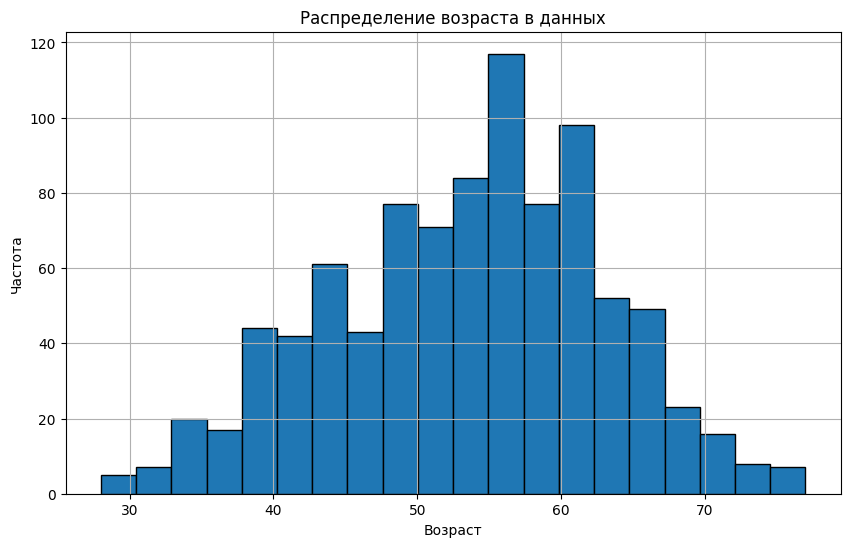

In [ ]:
# Построим гистограмму для параметра "Age"
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.title('Распределение возраста в данных')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)

# Отобразим гистограмму
plt.show()

##Деление данных на обучающую и тестовую выборки

In [ ]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='HeartDisease'),
                                                    data['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((734, 11), (184, 11))

##Категориальные переменные

In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# Находим категориальные признаки

categorials = X_train.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
# отфильтруем непрерывные признаки
integer = X_train.select_dtypes(['int', 'float']).columns.tolist()
X_train[integer].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,0,1,104,0.0


In [ ]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)

In [ ]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,ST_Slope_Up,RestingECG_ST,ST_Slope_Down,ChestPainType_TA,RestingECG_LVH,Sex_M,RestingECG_Normal,ChestPainType_NAP,ExerciseAngina_Y,ST_Slope_Flat,ChestPainType_ASY,ChestPainType_ATA,ExerciseAngina_N
795,42,120,240,1,194,0.8,0,0,0,1,0,0,1,1,1,0,0,0,0,1
25,36,130,209,0,178,0.0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
84,56,150,213,1,125,1.0,0,0,0,0,0,0,1,1,0,1,1,1,0,0
10,37,130,211,0,142,0.0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
344,51,120,0,1,104,0.0,0,0,0,0,0,0,1,1,0,0,1,1,0,1


#Дерево решений

In [ ]:
from sklearn.ensemble import  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [ ]:
dt.score(X_test, y_test)

0.7771739130434783

##Бэггинг

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=10)

In [ ]:
bagging.score(X_train, y_train)

0.946866485013624

In [ ]:
bagging.score(X_test, y_test)

0.8315217391304348

##RandomForest

In [ ]:
# Создаем модель RandomForest
clf_rf = RandomForestClassifier(random_state=10)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

1.0

In [ ]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

0.8804347826086957

##Топ-5 важных признаков

In [ ]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.131441
Oldpeak              0.098436
ST_Slope_Flat        0.096984
MaxHR                0.093117
Cholesterol          0.086941
Age                  0.081804
ChestPainType_ASY    0.076500
ExerciseAngina_N     0.072888
ExerciseAngina_Y     0.067616
RestingBP            0.061579
Sex_F                0.022971
FastingBS            0.021826
Sex_M                0.018105
ChestPainType_ATA    0.013849
RestingECG_Normal    0.012011
RestingECG_LVH       0.011248
ChestPainType_NAP    0.009668
RestingECG_ST        0.008433
ST_Slope_Down        0.008405
ChestPainType_TA     0.006176
dtype: float64

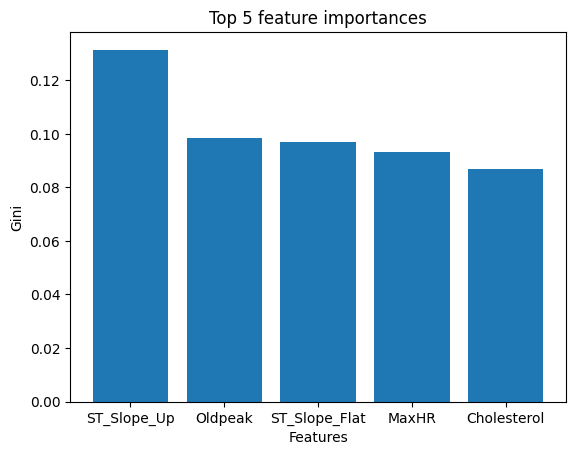

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

Проблемное место с classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Предсказания для тестового множества
y_pred_dt = dt.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
report_dt = classification_report(y_test, y_pred_dt)
report_rf = classification_report(y_test, y_pred_rf)

In [ ]:
print("Decision Tree Classifier:")
print(report_dt)

print("Random Forest Classifier:")
print(report_rf)

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.74      0.79       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



#Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

In [ ]:
# Создаем стэккинг и обучаем его на наших данных

Classifier = StackingClassifier(
    [
        ('LinearSVC', LinearSVC()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('DecisionTree', DecisionTreeClassifier())
    ])

In [ ]:
Classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

StackingClassifier(estimators=[('LinearSVC', LinearSVC()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('DecisionTree', DecisionTreeClassifier())])

In [ ]:
print(f'Score on train  {Classifier.score(X_train, y_train)}')
print(f'Score on test  {Classifier.score(X_test, y_test)}')

Score on train  0.952316076294278
Score on test  0.8695652173913043


In [ ]:
for i in Classifier.named_estimators:
    print(f'Score on train  with model {i} {Classifier.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Classifier.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model LinearSVC 0.5504087193460491
Score on test  with model LinearSVC 0.5869565217391305
Score on train  with model RandomForestClassifier 1.0
Score on test  with model RandomForestClassifier 0.875
Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.7880434782608695


#Итог

Лучше всех справился RandomForest <font color='green'>(87%)</font>. DecisionTree также показал хороший результат <font color='green'>(80%)</font> и не далеко от них оказался LinearSVC <font color='green'>(76%)</font>.